<a href="https://colab.research.google.com/github/elilaird/Stats202-FinalProject/blob/master/TreatmentEffect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Read in data

In [0]:
study_A = pd.read_csv("/content/drive/My Drive/Stats202_FinalProject/Data/Study_A.csv")
study_B = pd.read_csv("/content/drive/My Drive/Stats202_FinalProject/Data/Study_B.csv")
study_C = pd.read_csv("/content/drive/My Drive/Stats202_FinalProject/Data/Study_C.csv")
study_D = pd.read_csv("/content/drive/My Drive/Stats202_FinalProject/Data/Study_D.csv")
study_E = pd.read_csv("/content/drive/My Drive/Stats202_FinalProject/Data/Study_E.csv")

##Merge data sets A-D

In [4]:
#merge datasets
full_set = pd.concat([study_A, study_B, study_C, study_D])
full_set = full_set.reset_index(drop=True)

full_set.head()

,Study,Country,PatientID,SiteID,RaterID,AssessmentiD,TxGroup,VisitDay,P1,P2,P3,P4,P5,P6,P7,N1,N2,N3,N4,N5,N6,N7,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,G13,G14,G15,G16,PANSS_Total,LeadStatus
0,A,USA,10001,20035,30076,100679,Control,0,5,5,5,3,4,5,3,4,4,3,4,4,3,2,3,4,4,4,1,4,1,3,5,3,3,4,3,3,3,5,107,Assign to CS
1,A,USA,10001,20035,30076,101017,Control,11,5,5,5,3,4,5,3,4,4,3,4,4,3,3,4,4,4,4,1,4,1,3,5,3,3,4,3,3,3,5,109,Assign to CS
2,A,USA,10001,20035,30076,102177,Control,18,4,4,4,3,2,4,2,4,4,3,4,4,3,2,3,3,3,3,1,4,2,2,4,2,2,3,3,2,3,4,91,Passed
3,A,USA,10001,20035,30076,101533,Control,25,3,3,3,2,2,4,2,4,4,2,4,4,2,2,3,3,2,2,1,2,2,2,3,2,2,3,3,2,3,4,80,Flagged
4,A,USA,10001,20035,30076,100930,Control,39,3,3,4,2,1,4,2,4,4,2,4,4,1,2,3,3,1,2,1,1,2,2,3,2,2,3,3,2,3,4,77,Flagged


##Print descriptive statistics

In [5]:
full_set.describe()

,PatientID,SiteID,RaterID,AssessmentiD,VisitDay,P1,P2,P3,P4,P5,P6,P7,N1,N2,N3,N4,N5,N6,N7,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,G13,G14,G15,G16,PANSS_Total
count,20947.000000,20947.000000,20947.000000,20947.00000,20947.000000,20947.000000,20947.000000,20947.000000,20947.000000,20947.000000,20947.000000,20947.000000,20947.000000,20947.000000,20947.000000,20947.000000,20947.000000,20947.000000,20947.000000,20947.000000,20947.000000,20947.000000,20947.000000,20947.000000,20947.000000,20947.000000,20947.000000,20947.000000,20947.000000,20947.000000,20947.000000,20947.000000,20947.000000,20947.000000,20947.000000,20947.000000
mean,28795.612116,56495.791760,84791.944288,287049.00000,92.392085,3.019812,2.698334,2.548241,1.884184,1.801022,2.955029,1.744212,2.965484,3.035041,2.520504,3.073137,3.258319,2.601327,2.426075,1.945625,2.381152,1.572779,2.046594,1.923903,1.961140,2.063350,1.755765,2.645486,1.863942,2.411563,3.247768,2.469805,1.840550,2.472956,2.678665,71.811763
std,8209.225459,16227.846678,24352.884304,82095.67987,95.033820,1.415610,1.253902,1.562352,1.035303,1.172928,1.384043,0.979097,1.051342,1.025323,1.051431,1.087764,1.184443,1.117760,1.075634,1.066738,1.231390,0.937404,1.038377,0.993311,1.117903,1.001978,0.982966,1.309234,0.986693,1.032021,1.221057,1.059926,0.987012,1.122784,1.196251,19.264469
min,10001.000000,20001.000000,30001.000000,100001.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000
25%,30106.000000,60011.000000,90024.000000,300949.50000,15.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,58.000000
50%,30747.000000,60084.000000,90205.000000,306186.00000,67.000000,3.000000,3.000000,2.000000,2.000000,1.000000,3.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,70.000000
75%,31360.000000,60165.000000,90352.000000,311422.50000,133.000000,4.000000,3.000000,4.000000,3.000000,2.000000,4.000000,2.000000,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,85.000000
max,40223.000000,80001.000000,120050.000000,402948.00000,480.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,166.000000


##Analyze unique values

In [6]:
full_set.nunique()

Study               4
Country            28
PatientID        2434
SiteID            284
RaterID           639
AssessmentiD    20947
TxGroup             2
VisitDay          444
P1                  7
P2                  7
P3                  7
P4                  7
P5                  7
P6                  7
P7                  7
N1                  7
N2                  7
N3                  7
N4                  7
N5                  7
N6                  7
N7                  7
G1                  7
G2                  7
G3                  6
G4                  7
G5                  7
G6                  7
G7                  7
G8                  7
G9                  7
G10                 7
G11                 7
G12                 7
G13                 7
G14                 7
G15                 7
G16                 7
PANSS_Total       115
LeadStatus          3
dtype: int64

##Aggregate symptom values into total 

In [0]:
#add columns for sums of Positive, Negative, General Symptoms
full_set['Total_P'] = full_set['P1'] + full_set['P2'] +full_set['P3'] + full_set['P4'] + full_set['P5'] + full_set['P6'] + full_set['P7']
full_set['Total_N'] = full_set['N1'] + full_set['N2'] +full_set['N3'] + full_set['N4'] + full_set['N5'] + full_set['N6'] + full_set['N7']
full_set['Total_G'] = full_set['G1'] + full_set['G2'] +full_set['G3'] + full_set['G4'] + full_set['G5'] + full_set['G6'] + full_set['G7'] + full_set['G8'] + full_set['G9'] +full_set['G10'] + full_set['G11'] + full_set['G12'] + full_set['G13'] + full_set['G14'] + full_set['G15'] + full_set['G16']

In [8]:
full_set.head()


,Study,Country,PatientID,SiteID,RaterID,AssessmentiD,TxGroup,VisitDay,P1,P2,P3,P4,P5,P6,P7,N1,N2,N3,N4,N5,N6,N7,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,G13,G14,G15,G16,PANSS_Total,LeadStatus,Total_P,Total_N,Total_G
0,A,USA,10001,20035,30076,100679,Control,0,5,5,5,3,4,5,3,4,4,3,4,4,3,2,3,4,4,4,1,4,1,3,5,3,3,4,3,3,3,5,107,Assign to CS,30,24,53
1,A,USA,10001,20035,30076,101017,Control,11,5,5,5,3,4,5,3,4,4,3,4,4,3,3,4,4,4,4,1,4,1,3,5,3,3,4,3,3,3,5,109,Assign to CS,30,25,54
2,A,USA,10001,20035,30076,102177,Control,18,4,4,4,3,2,4,2,4,4,3,4,4,3,2,3,3,3,3,1,4,2,2,4,2,2,3,3,2,3,4,91,Passed,23,24,44
3,A,USA,10001,20035,30076,101533,Control,25,3,3,3,2,2,4,2,4,4,2,4,4,2,2,3,3,2,2,1,2,2,2,3,2,2,3,3,2,3,4,80,Flagged,19,22,39
4,A,USA,10001,20035,30076,100930,Control,39,3,3,4,2,1,4,2,4,4,2,4,4,1,2,3,3,1,2,1,1,2,2,3,2,2,3,3,2,3,4,77,Flagged,19,21,37


##Create new data set without individual scores

In [9]:
#create new dataset with just the labels
combined = full_set.drop(['P1','P2','P3','P4','P5','P6','P7','N1','N2','N3','N4','N5','N6','N7','G1','G2','G3','G4','G5','G6','G7','G8','G9','G10','G11','G12','G13','G14','G15','G16', 'AssessmentiD', 'Study'], axis=1)

#filter for passed observations
combined = combined.loc[combined['LeadStatus'] == 'Passed']
combined.LeadStatus.unique()

combined = combined.drop(['LeadStatus'],axis=1)
combined.head()

,Country,PatientID,SiteID,RaterID,TxGroup,VisitDay,PANSS_Total,Total_P,Total_N,Total_G
2,USA,10001,20035,30076,Control,18,91,23,24,44
7,USA,10002,20011,30016,Control,0,85,26,19,40
8,USA,10002,20011,30016,Control,7,85,26,20,39
9,USA,10002,20011,30016,Control,9,94,25,27,42
16,USA,10004,20006,30013,Treatment,0,95,26,27,42


##Print descriptive statistics

In [10]:
combined.describe()

,PatientID,SiteID,RaterID,VisitDay,PANSS_Total,Total_P,Total_N,Total_G
count,15841.000000,15841.000000,15841.000000,15841.000000,15841.000000,15841.000000,15841.000000,15841.000000
mean,28174.176125,55064.728805,82652.367654,100.429455,70.889906,16.233255,19.778676,34.877975
std,6680.802683,12950.253773,19443.291762,99.630128,18.231529,6.191958,5.318101,9.245881
min,10001.000000,20001.000000,30001.000000,0.000000,30.000000,7.000000,7.000000,16.000000
25%,30139.000000,60013.000000,90034.000000,17.000000,58.000000,11.000000,16.000000,28.000000
50%,30663.000000,60080.000000,90177.000000,72.000000,69.000000,15.000000,20.000000,34.000000
75%,31173.000000,60150.000000,90317.000000,153.000000,83.000000,20.000000,23.000000,41.000000
max,40222.000000,80001.000000,120050.000000,480.000000,138.000000,41.000000,42.000000,70.000000


##Create Ranges for Visit Day

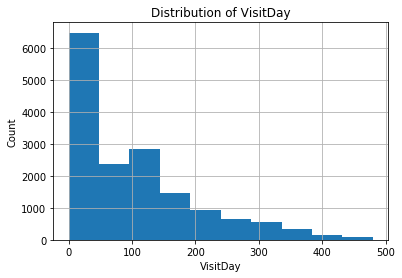

In [16]:
combined['VisitDay'].hist()
plt.title('Distribution of VisitDay')
plt.xlabel('VisitDay')
plt.ylabel('Count')
plt.savefig('/content/drive/My Drive/Stats202_FinalProject/Figures/Distribution_VisitDay.png')

In [0]:
#Add new column labeling into appopriate range

#possible range labels
rangeLabels = ['0',
               '1 >= day <= 10',
               '11 >= day <= 20',
               '21 >= day <= 30',
               '31 >= day <= 40',
               '41 >= day <= 50',
               '51 >= day <= 60',
               '61 >= day <= 70',
               '71 >= day <= 80',
               '81 >= day <= 90',
               '91 >= day <= 100',
               '101 >= day <= 110',
               '111 >= day <= 120',
               '121 >= day <= 130',
               '131 >= day <= 140',
               '141 >= day <= 150',
               'day > 150']


#possible ranges
ranges = [(combined['VisitDay'] == 0),
          (combined['VisitDay'].ge(1)) & (combined['VisitDay'].lt(11)),
          (combined['VisitDay'].ge(11)) & (combined['VisitDay'].lt(21)),
          (combined['VisitDay'].ge(21)) & (combined['VisitDay'].lt(31)),
          (combined['VisitDay'].ge(31)) & (combined['VisitDay'].lt(41)),
          (combined['VisitDay'].ge(41)) & (combined['VisitDay'].lt(51)),
          (combined['VisitDay'].ge(51)) & (combined['VisitDay'].lt(61)),
          (combined['VisitDay'].ge(61)) & (combined['VisitDay'].lt(71)),
          (combined['VisitDay'].ge(71)) & (combined['VisitDay'].lt(81)),
          (combined['VisitDay'].ge(81)) & (combined['VisitDay'].lt(91)),
          (combined['VisitDay'].ge(91)) & (combined['VisitDay'].lt(101)),
          (combined['VisitDay'].ge(101)) & (combined['VisitDay'].lt(111)),
          (combined['VisitDay'].ge(111)) & (combined['VisitDay'].lt(121)),
          (combined['VisitDay'].ge(121)) & (combined['VisitDay'].lt(131)),
          (combined['VisitDay'].ge(131)) & (combined['VisitDay'].lt(141)),
          (combined['VisitDay'].ge(141)) & (combined['VisitDay'].lt(151)), 
          (combined['VisitDay'].ge(151)) ]



#factorize ranges
rangeFactors = pd.factorize(rangeLabels)

##Add "Range" column to combined data set

In [29]:
combined['Range'] = np.select(ranges, rangeFactors[0])
combined.head()

,Country,PatientID,SiteID,RaterID,TxGroup,VisitDay,PANSS_Total,Total_P,Total_N,Total_G,Range
2,USA,10001,20035,30076,Control,18,91,23,24,44,2
7,USA,10002,20011,30016,Control,0,85,26,19,40,0
8,USA,10002,20011,30016,Control,7,85,26,20,39,1
9,USA,10002,20011,30016,Control,9,94,25,27,42,1
16,USA,10004,20006,30013,Treatment,0,95,26,27,42,0


## Pivot the combined table to group by range

In [30]:
grouped = combined[['TxGroup','Total_P','Total_N','Total_G','PANSS_Total','Range']] 
grouped.to_excel('/content/drive/My Drive/Stats202_FinalProject/Figures/grouped_data.xlsx')
grouped.head()


,TxGroup,Total_P,Total_N,Total_G,PANSS_Total,Range
2,Control,23,24,44,91,2
7,Control,26,19,40,85,0
8,Control,26,20,39,85,1
9,Control,25,27,42,94,1
16,Treatment,26,27,42,95,0


In [31]:
grouped = pd.pivot_table(grouped, values=['Total_P','Total_N','Total_G','PANSS_Total'], index=['Range'], columns='TxGroup', aggfunc={'Total_P':np.mean,'Total_N':np.mean,'Total_G':np.mean,'PANSS_Total':np.mean})
grouped.to_excel('/content/drive/My Drive/Stats202_FinalProject/Figures/grouped_by_range_data.xlsx')
grouped.head()

PANSS_Total               Total_G  ...    Total_N    Total_P           
TxGroup     Control  Treatment    Control  ...  Treatment    Control  Treatment
Range                                      ...                                 
0         87.704388  88.076050  42.963048  ...  23.129398  21.682448  21.557321
1         87.682540  87.455947  42.916100  ...  23.231278  21.884354  21.277533
2         84.664430  85.262673  41.532438  ...  22.572581  20.579418  20.883641
3         83.225951  83.840807  40.854586  ...  22.553812  19.997763  20.026906
4         78.044355  76.709544  38.068548  ...  20.701245  19.125000  18.261411

[5 rows x 8 columns]

##Plot the average symptom scores over time

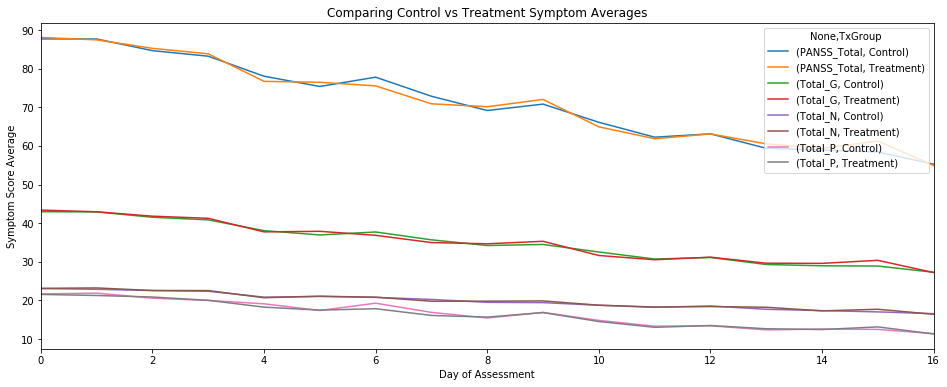

In [54]:

grouped.plot()
fig = plt.gcf()
fig.set_size_inches(16,6)
plt.title('Comparing Control vs Treatment Symptom Averages')
plt.xlabel('Day of Assessment')
plt.ylabel('Symptom Score Average')

plt.savefig('/content/drive/My Drive/Stats202_FinalProject/Figures/SymptomAvg_overtime.png')

##Compare the averages of control and treatment PANSS_Total scores

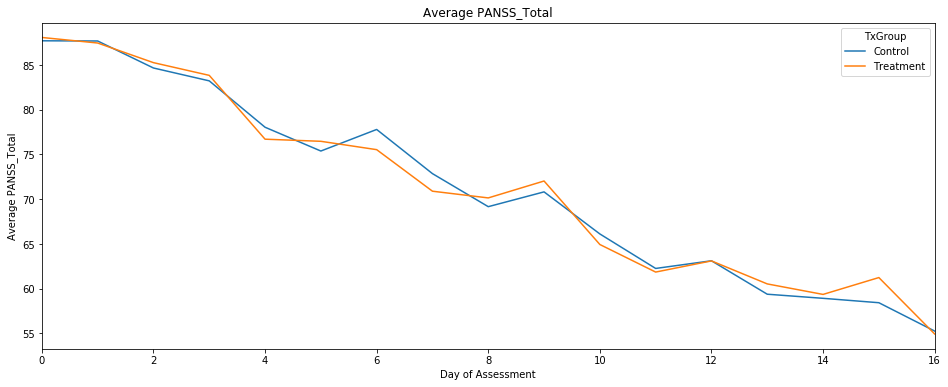

In [55]:
grouped['PANSS_Total'].plot()
fig = plt.gcf()
fig.set_size_inches(16,6)
plt.title('Average PANSS_Total')
plt.xlabel('Day of Assessment')
plt.ylabel('Average PANSS_Total')

plt.savefig('/content/drive/My Drive/Stats202_FinalProject/Figures/PANSS_Total_overtime.png')

##Compare the averages of control and treatment Total_P scores

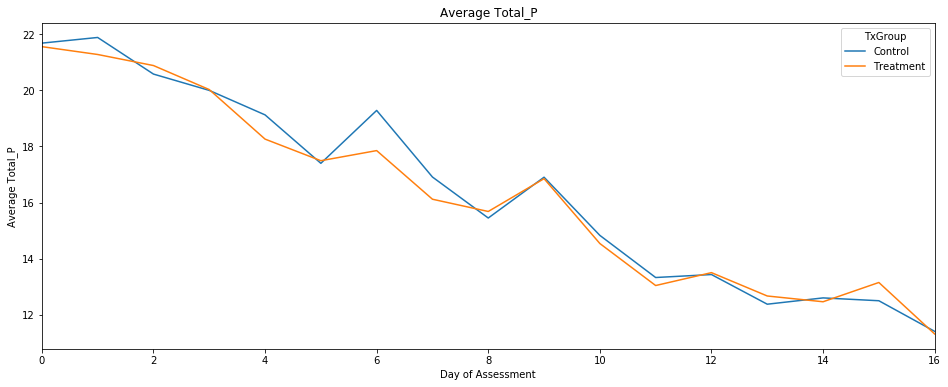

In [56]:
grouped['Total_P'].plot()
fig = plt.gcf()
fig.set_size_inches(16,6)
plt.title('Average Total_P')
plt.xlabel('Day of Assessment')
plt.ylabel('Average Total_P')

plt.savefig('/content/drive/My Drive/Stats202_FinalProject/Figures/Total_P_overtime.png')

##Compare the averages of control and treatment Total_N scores

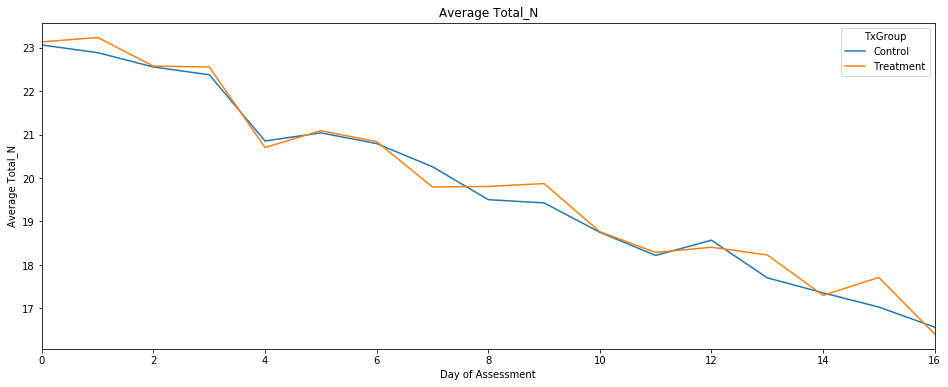

In [57]:
grouped['Total_N'].plot()
fig = plt.gcf()
fig.set_size_inches(16,6)
plt.title('Average Total_N')
plt.xlabel('Day of Assessment')
plt.ylabel('Average Total_N')

plt.savefig('/content/drive/My Drive/Stats202_FinalProject/Figures/Total_N_overtime.png')

##Compare averages of control and treatment Total_G scores

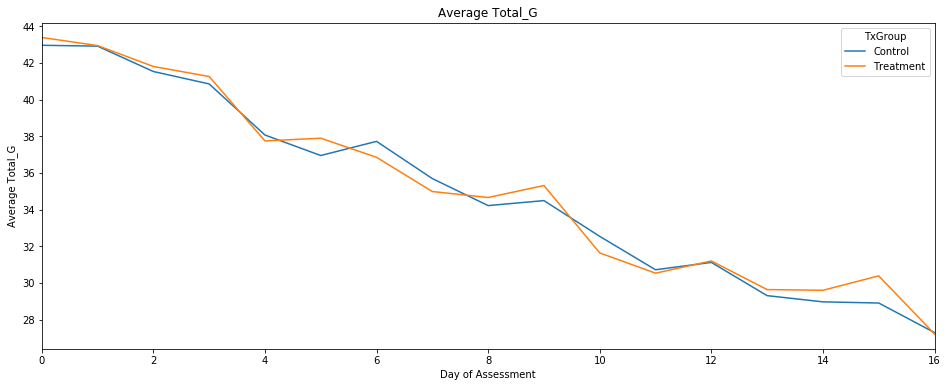

In [58]:
grouped['Total_G'].plot()
fig = plt.gcf()
fig.set_size_inches(16,6)
plt.title('Average Total_G')
plt.xlabel('Day of Assessment')
plt.ylabel('Average Total_G')

plt.savefig('/content/drive/My Drive/Stats202_FinalProject/Figures/Total_G_overtime.png')

#Fit linear model for Difference in Differences

In [0]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [0]:
combined.head()

,Country,PatientID,SiteID,RaterID,TxGroup,VisitDay,PANSS_Total,Total_P,Total_N,Total_G,Range
2,USA,10001,20035,30076,Control,18,91,23,24,44,2
7,USA,10002,20011,30016,Control,0,85,26,19,40,0
8,USA,10002,20011,30016,Control,7,85,26,20,39,1
9,USA,10002,20011,30016,Control,9,94,25,27,42,1
16,USA,10004,20006,30013,Treatment,0,95,26,27,42,0


####Encode categorical variable 'TxGroup'

In [0]:
#encode categorical variable 'TxGroup'
one_hot_groups = {'TxGroup': {'Control':0,'Treatment':1}}
combined.replace(one_hot_groups, inplace=True)
combined.head()

,Country,PatientID,SiteID,RaterID,TxGroup,VisitDay,PANSS_Total,Total_P,Total_N,Total_G,Range
2,USA,10001,20035,30076,0,18,91,23,24,44,2
7,USA,10002,20011,30016,0,0,85,26,19,40,0
8,USA,10002,20011,30016,0,7,85,26,20,39,1
9,USA,10002,20011,30016,0,9,94,25,27,42,1
16,USA,10004,20006,30013,1,0,95,26,27,42,0


###Fit linear model for Total_P score

In [0]:
total_p_reg = smf.ols(formula='Total_P ~ TxGroup + Range + Range:TxGroup',data= combined).fit()
total_p_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Total_P   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     3714.
Date:                Wed, 07 Aug 2019   Prob (F-statistic):               0.00
Time:                        21:37:15   Log-Likelihood:                -47139.
No. Observations:               15841   AIC:                         9.429e+04
Df Residuals:                   15837   BIC:                         9.432e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        21.7473      0.090    241.210      0.000      21.571      21.924
TxGroup          -0.1738      0.128     -1.363      0.173      -0.424       0.076
Range            -0.6648      0.009    -74.899      0.000      -0.682      -0.647
Range:TxGroup     0.0047      0.013      0.375      0.708      -0.020       0.029
==============================================================================
Omnibus:                     1029.586   Durbin-Watson:                   0.567
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1322.276
Skew:                           0.609   Prob(JB):                    7.44e-288
Kurtosis:                       3.722   Cond. No.                         45.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###Fit linear model for Total_N scores

In [0]:
total_n_reg = smf.ols(formula='Total_N ~ TxGroup + Range + Range:TxGroup',data= combined).fit()
total_n_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Total_N   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     1569.
Date:                Wed, 07 Aug 2019   Prob (F-statistic):               0.00
Time:                        21:41:15   Log-Likelihood:                -46888.
No. Observations:               15841   AIC:                         9.378e+04
Df Residuals:                   15837   BIC:                         9.382e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        23.1900      0.089    261.319      0.000      23.016      23.364
TxGroup           0.1207      0.126      0.962      0.336      -0.125       0.367
Range            -0.4175      0.009    -47.787      0.000      -0.435      -0.400
Range:TxGroup    -0.0125      0.012     -1.014      0.311      -0.037       0.012
==============================================================================
Omnibus:                      177.947   Durbin-Watson:                   0.529
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.876
Skew:                           0.221   Prob(JB):                     1.08e-43
Kurtosis:                       3.323   Cond. No.                         45.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###Fit linear model for Total_G scores

In [0]:
total_g_reg = smf.ols(formula='Total_G ~ TxGroup + Range + Range:TxGroup',data= combined).fit()
total_g_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Total_G   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     4136.
Date:                Wed, 07 Aug 2019   Prob (F-statistic):               0.00
Time:                        21:42:19   Log-Likelihood:                -53128.
No. Observations:               15841   AIC:                         1.063e+05
Df Residuals:                   15837   BIC:                         1.063e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        43.0969      0.132    327.540      0.000      42.839      43.355
TxGroup           0.2791      0.186      1.500      0.134      -0.086       0.644
Range            -1.0095      0.013    -77.937      0.000      -1.035      -0.984
Range:TxGroup    -0.0213      0.018     -1.165      0.244      -0.057       0.015
==============================================================================
Omnibus:                      764.024   Durbin-Watson:                   0.655
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1059.962
Skew:                           0.462   Prob(JB):                    6.79e-231
Kurtosis:                       3.867   Cond. No.                         45.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###Fit linear model for PANSS_Total

In [0]:
panss_total_reg = smf.ols(formula='PANSS_Total ~ TxGroup + Range + Range:TxGroup',data= combined).fit()
panss_total_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PANSS_Total   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     4904.
Date:                Wed, 07 Aug 2019   Prob (F-statistic):               0.00
Time:                        21:43:23   Log-Likelihood:                -63262.
No. Observations:               15841   AIC:                         1.265e+05
Df Residuals:                   15837   BIC:                         1.266e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        88.0343      0.249    352.867      0.000      87.545      88.523
TxGroup           0.2261      0.353      0.641      0.522      -0.466       0.918
Range            -2.0917      0.025    -85.169      0.000      -2.140      -2.044
Range:TxGroup    -0.0292      0.035     -0.840      0.401      -0.097       0.039
==============================================================================
Omnibus:                      716.582   Durbin-Watson:                   0.603
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1045.294
Skew:                           0.425   Prob(JB):                    1.04e-227
Kurtosis:                       3.928   Cond. No.                         45.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""